In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from src.nlp_preprocessing import get_sentiment_label

plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# reading the data 
df = pd.read_csv('../data/opinion_lexicon_scored_small_sample.csv')
df.shape

(9000, 17)

In [3]:
df.describe()

,overall,unixReviewTime,vote,sentiment_score
count,9000.000000,9.000000e+03,1713.000000,9000.000000
mean,3.000000,1.439360e+09,9.738471,0.081188
std,1.699768,6.302499e+07,26.193707,0.213692
min,1.000000,1.002586e+09,2.000000,-1.000000
25%,1.000000,1.410307e+09,2.000000,0.000000
50%,3.000000,1.449619e+09,3.000000,0.026667
75%,5.000000,1.483661e+09,7.000000,0.100000
max,5.000000,1.537834e+09,391.000000,1.000000


# What is the distribution of sentiment scores across the dataset?

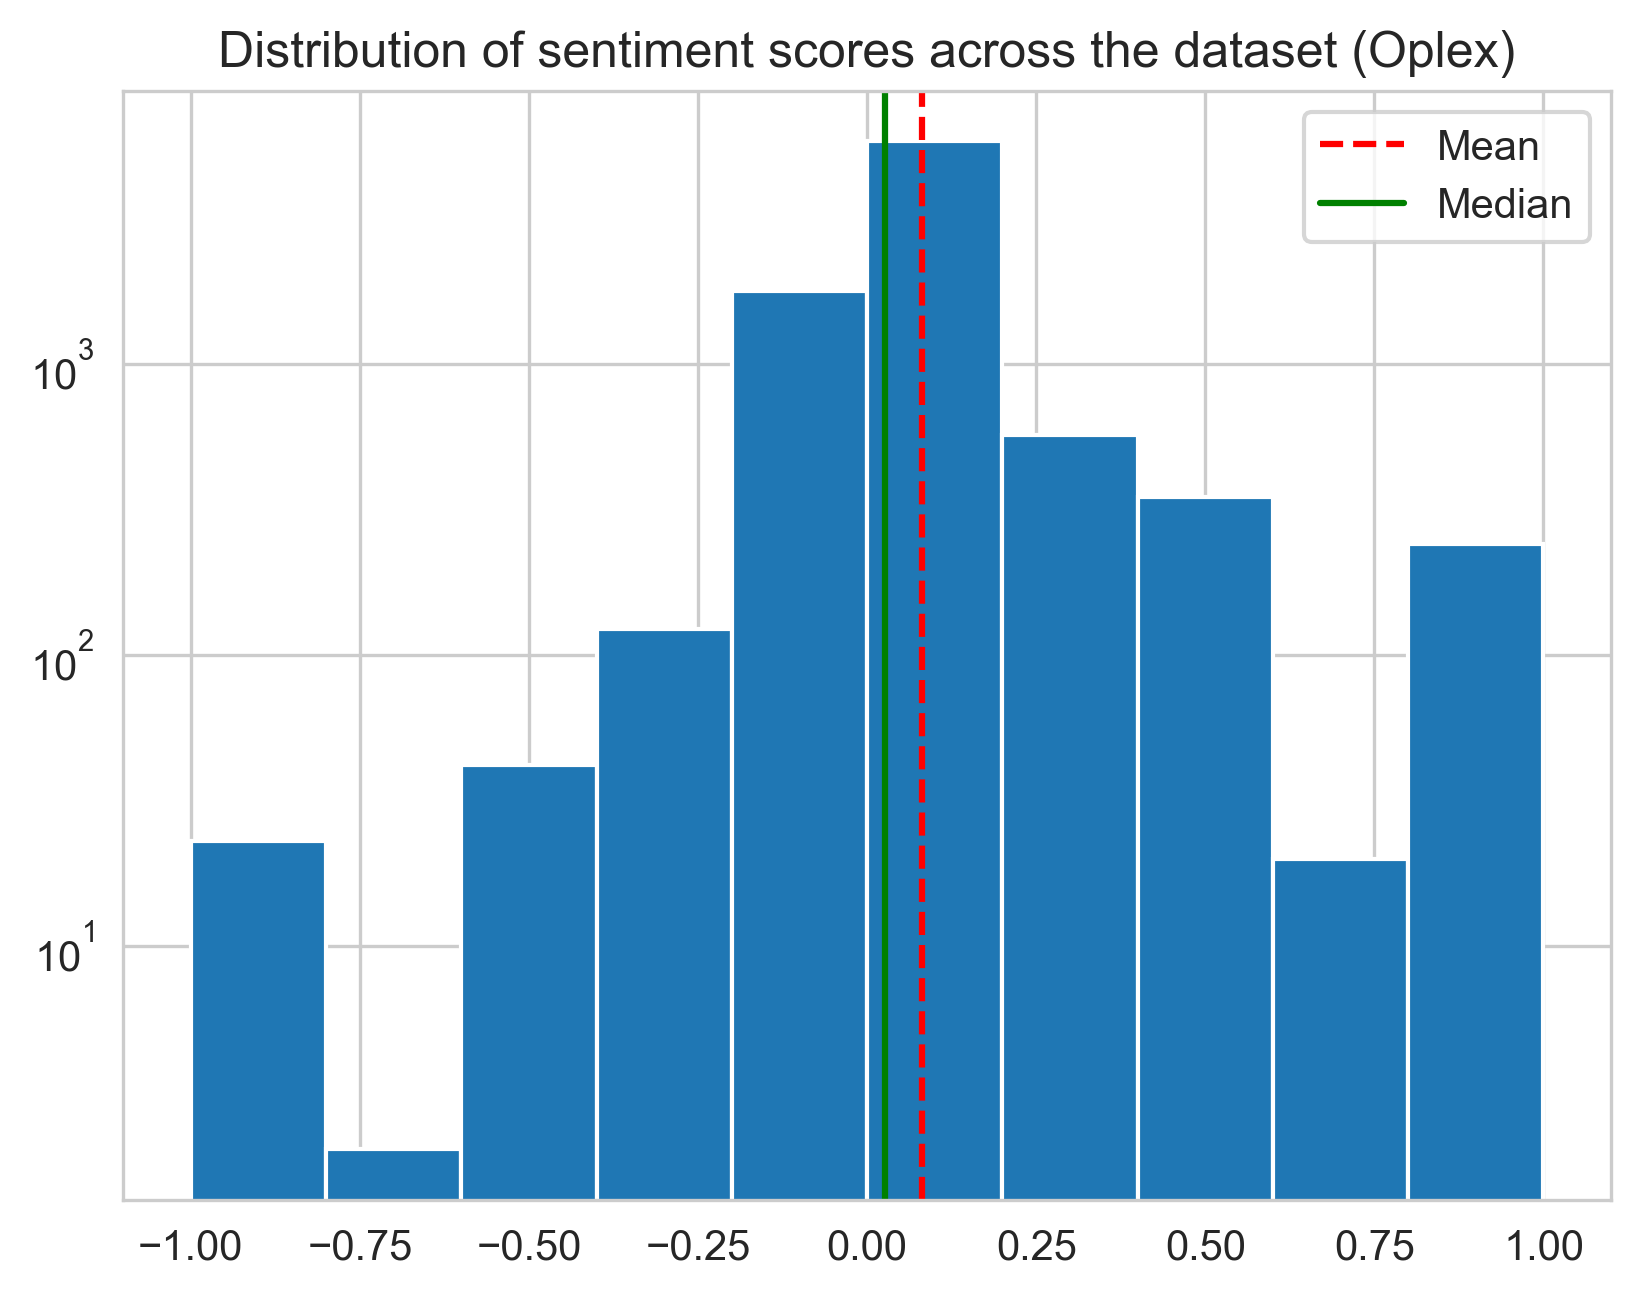

In [20]:
df['sentiment_score'].hist()
plt.axvline(df['sentiment_score'].mean(), color='red', linestyle='--')
plt.axvline(df['sentiment_score'].median(), color='green')
plt.legend({'Mean': df['sentiment_score'].mean(), 'Median':df['sentiment_score'].median()})
plt.title('Distribution of sentiment scores across the dataset (Oplex)')
plt.yscale('log')
plt.show()